In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import subprocess
import shlex
# My module
import gen_rand
from fileinput import close

print("START")

START


### Random sets generation

In next three cells we are going:
*  Compile C++ code using comp.sh script
*  Make array of sets with randome integers
*  Run binary using sets as arguments and save amount of duplicates in <i>'temp.txt'</i>

Setup random generator:
*  <b>start</b> : number of elements for the shortest first set (min>=3)
*  <b>stop</b> : number of elements for the longest las set (max<=1001). Limited with number of arguments of binary file
*  <b>step</b> : incriment from <i>start</i> to <i>stop</i>

In [89]:
!sh comp.sh;

start = 3
stop  = 1001
step  = 1

In [90]:
Obj1 = gen_rand.Rand_set(start, stop, step)
rand_arr = Obj1.gen_rand_prnt(ret=1)
del(Obj1)
rand_arr.shape

(998,)

In [91]:
!rm -f size_dup.txt;
!echo "Len Dup" >> size_dup.txt;

with open('size_dup.txt', "a") as outfile:
    for i in rand_arr:
        t = np.array2string(np.array(list(i)))[1:-1]
        t = "./bi_tree_bin " + t
        t = shlex.split(t)
        subprocess.run(t, stdout=outfile)

outfile.close()
del(outfile)
del(rand_arr)
del(t)

!wc -l size_dup.txt;

     999 size_dup.txt


### Dataframe

Working with data:
*  Make dataframe(df) from 'size_dup.txt' file
*  Add one more column to df with percentage of duplicates in input
*  Print three drawings :
    * Number of inputs vs amount of duplicates
    * Number of inputs vs percentage of duplicates
    * Percentage histogram
    * Derivative of duplicates

In [92]:
dDup = pd.read_table("size_dup.txt", delimiter=" ", index_col=False)
dDup['%_Perc'] = (dDup['Dup'] / dDup['Len']) * 1000
dDup['%_Perc'] = dDup['%_Perc'].astype(int) / 10
dDup['Der'] = dDup['Dup'].diff() / step
dDup.tail(5)

,Len,Dup,%_Perc,Der
993,996,26,2.6,-1.0
994,997,25,2.5,-1.0
995,998,24,2.4,-1.0
996,999,23,2.3,-1.0
997,1000,22,2.2,-1.0


### Vizualization 1

*  <b>Fig 1</b> : Grafic showing amount of duplicates vs length of inputs.
*  <b>Fig 2</b> : Grafic showing porcentage of duplicates vs length of inputs.
*  <b>Fig 3</b> : Grafic showing how ofen do we meet duplicates.
*  <b>Fig 4</b> : Grafic showing how changes (derivative) amount of duplicates with grawing amount of inputs.

<AxesSubplot:xlabel='Len', ylabel='Der'>

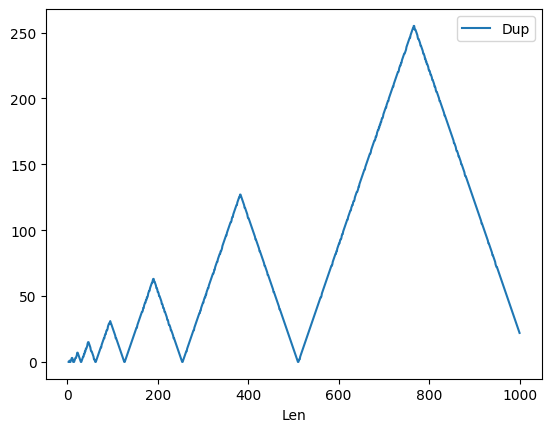

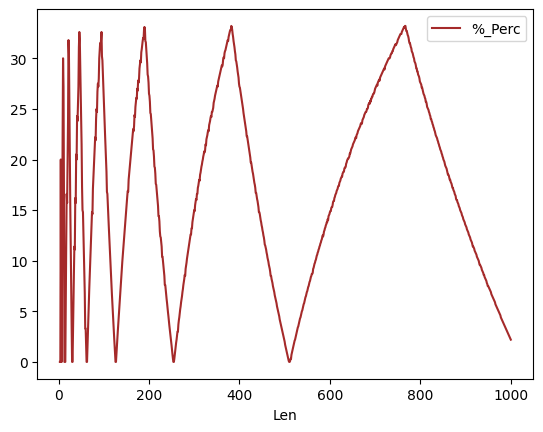

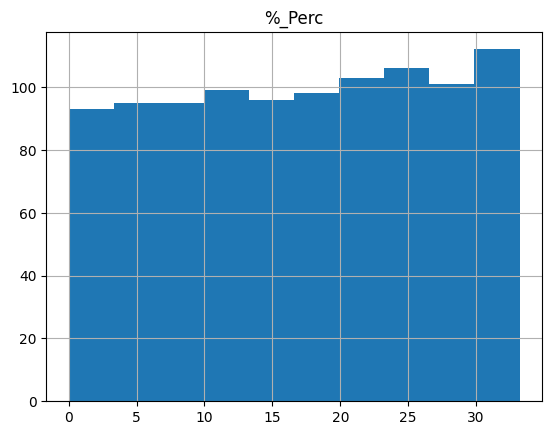

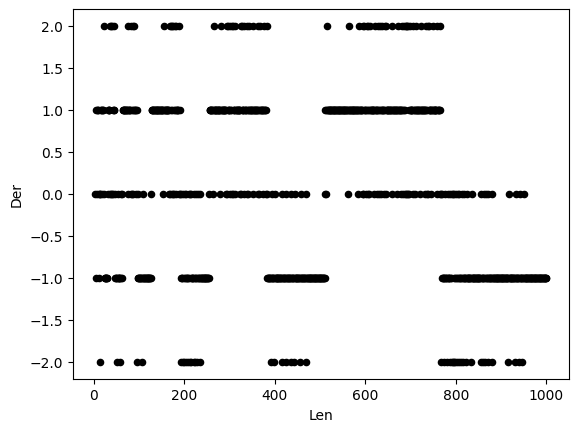

In [93]:
dDup.plot(x='Len', y='Dup')
dDup.plot.line(x='Len', y='%_Perc', color='brown')
dDup.hist(column='%_Perc')
dDup.plot.scatter(x='Len', y='Der', color='black')

### Semi-conclusion

My algorithm, converting vector to the Binary Tree, is very unoptimized. As we see, there are a lot of duplicates. Fortunately, there are no more than two same numbers in the tree, and all duplicated numbers are leaves. There will not be a problem to clean up the tree from duplicated numbers.

This algorithm does not have constant complexity, and amount of duplicates changes lineary with incrising number of inputs. 

You can find implimentation in <i>bi_tree.h</i> in <i><b>STRUC* gen_triple(int* iarr, int start, int finish);</b></i> function. Deliting of duplicates could be found in <i>bi_tree.h</i> in <i><b>void del_dup(T *root, Y *out);</i></b> function.

With next steps you will see how do I work with the Binary tree.

In [94]:
# Memory clean up
del(dDup)
!rm -f size_dup.txt;